<a href="https://colab.research.google.com/github/ValeRomanA/Proyecto-2_IE0247/blob/main/IE0247_Proyecto_II_2023_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal


# Introducción: Modulación AM

En esta sección produciremos la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ para representar la señal AM en los dominios de tiempo y la frecuencia, y estudiar el efecto de cambiar cualquiera de los parámetros involucrados.

La señal de mensaje será $m(t)=A_m cos(2 \pi f_mt)$ y la portadora $c(t)=A_c cos(2 \pi f_ct)$. Luego se produce la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en el dominio del tiempo.


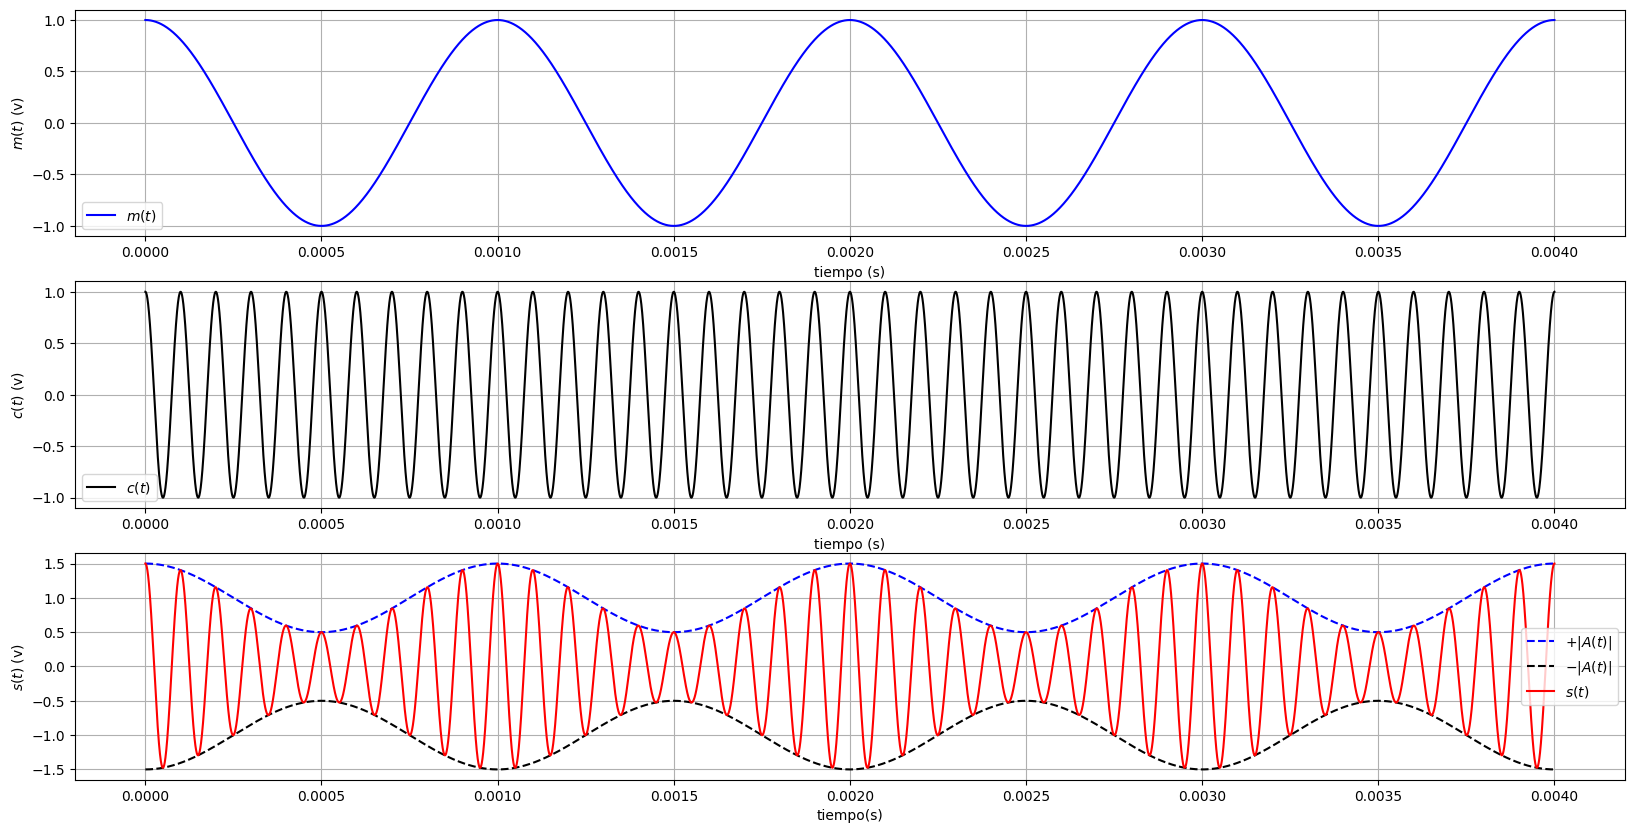

In [ ]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud.


## -- No es necesario modificar el código siguiente
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(311)
ax3 = f.add_subplot(312)
ax5 = f.add_subplot(313)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()
ax1.grid()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()
ax3.grid()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo(s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()
ax5.grid()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)


# Parámetros involucrados en la modulación AM.


Observemos la señal de mensaje $m(t)=A_ccos(2 \pi f_mt)$, la portadora $c(t)=A_ccos(2 \pi f_ct)$, y la señal AM $s(t)=A_c[1+K_a m(t)]\cos(2 \pi f_ct)$ en los dominios del tiempo y de la frecuencia.

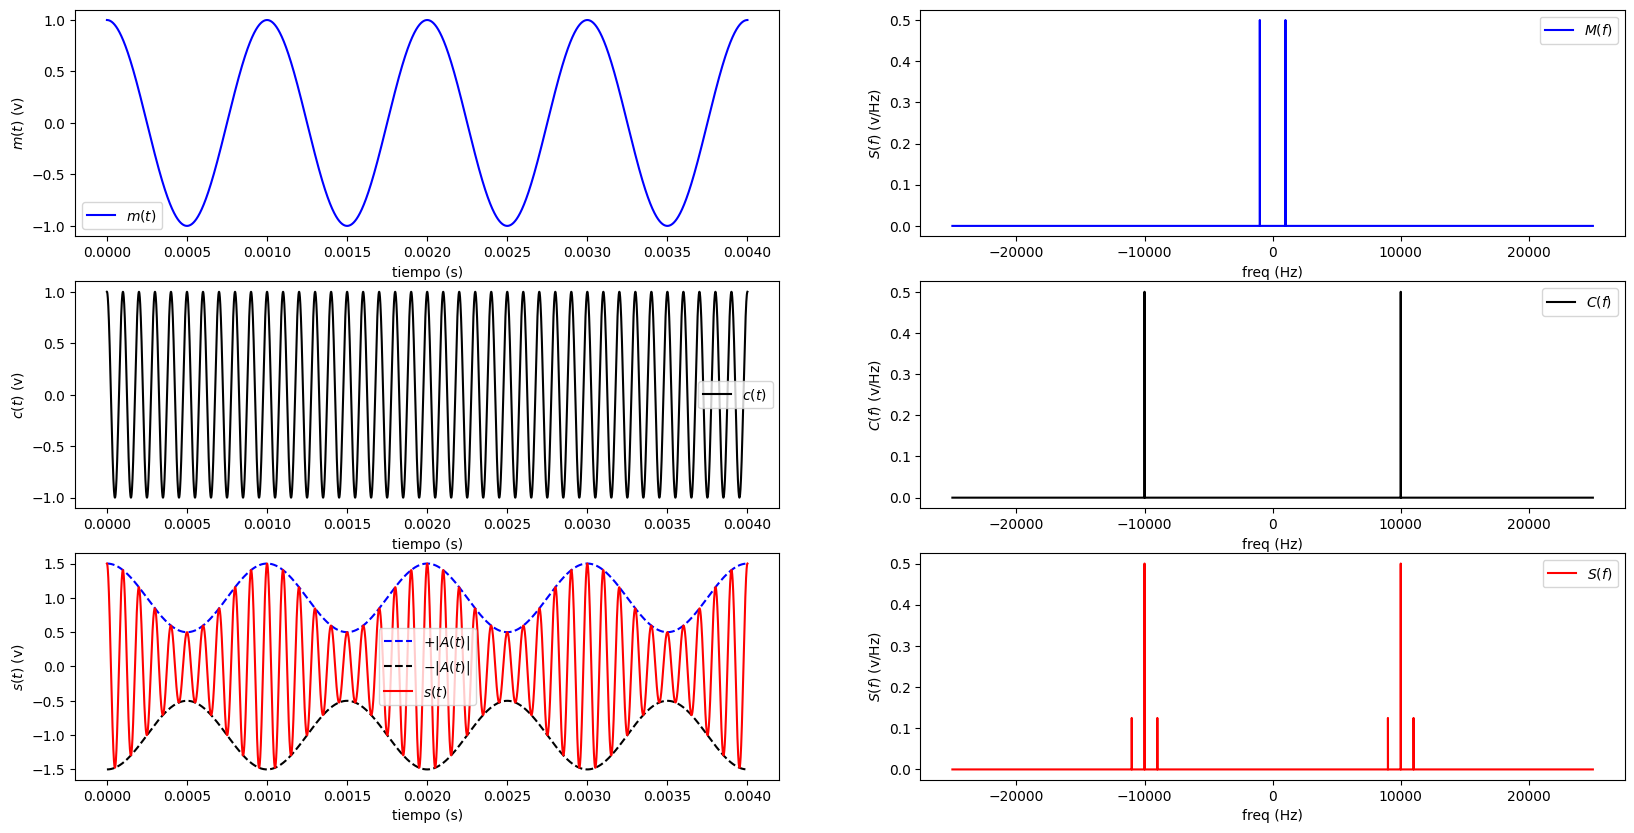

In [ ]:
Am=1 # Amplitud de la señal mensaje
fm=1000 # Frecuencia de la señal mensaje
Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.5 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


**Ver: Ejercicios indicados en el planteamiento del proyecto**

# Efecto de cambiar el índice de modulación $\mu$

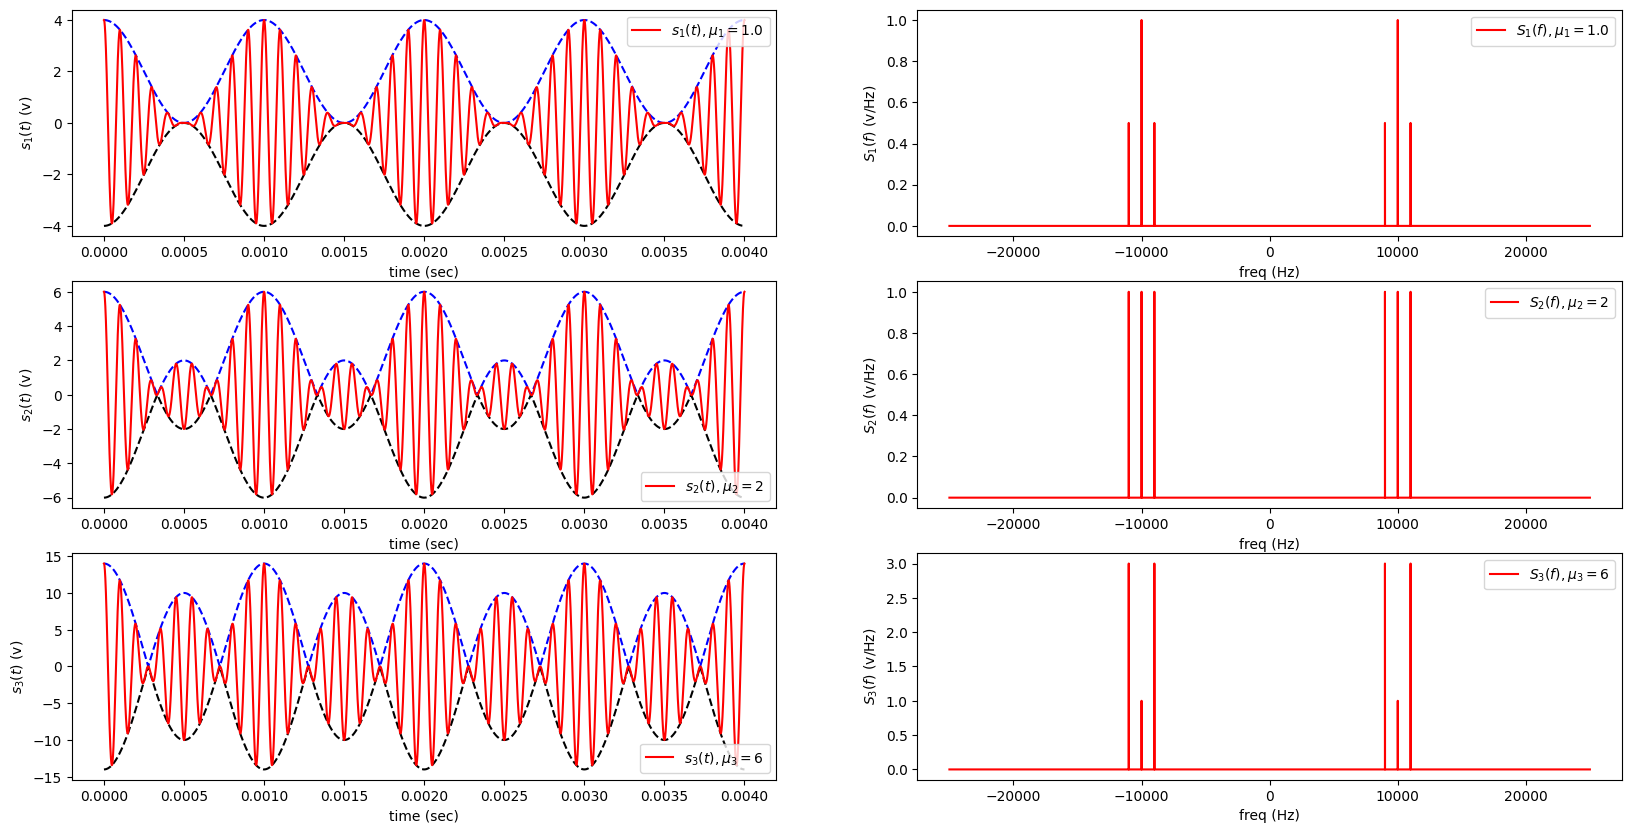

In [ ]:
Am1=0.5  # Amplitud de la señal de mensaje 1
Am2=1 # Amplitud de la señal de mensaje 2
Am3=3 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=2 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

**Ver Ejercicios en el planteamiento del proyecto**

# Modulación AM de señales con múltiples componentes armónicos

Se aplicará modulación AM para la señal $X(t)=A_{m1}cos(2 \pi f_{c1}t)+A_{m2}cos(2 \pi f_{c2}t)+A_{m3}cos(2 \pi f_{c3}t)$

Función en Python para generar $m(t)$:

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

Función en Python para generar la portadora $c(t)$

In [ ]:
def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

Función en Python para generar la modulación AM $s(t)$.

In [ ]:
def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Producción y graficación de las señales en el tiempo y la frecuencia:

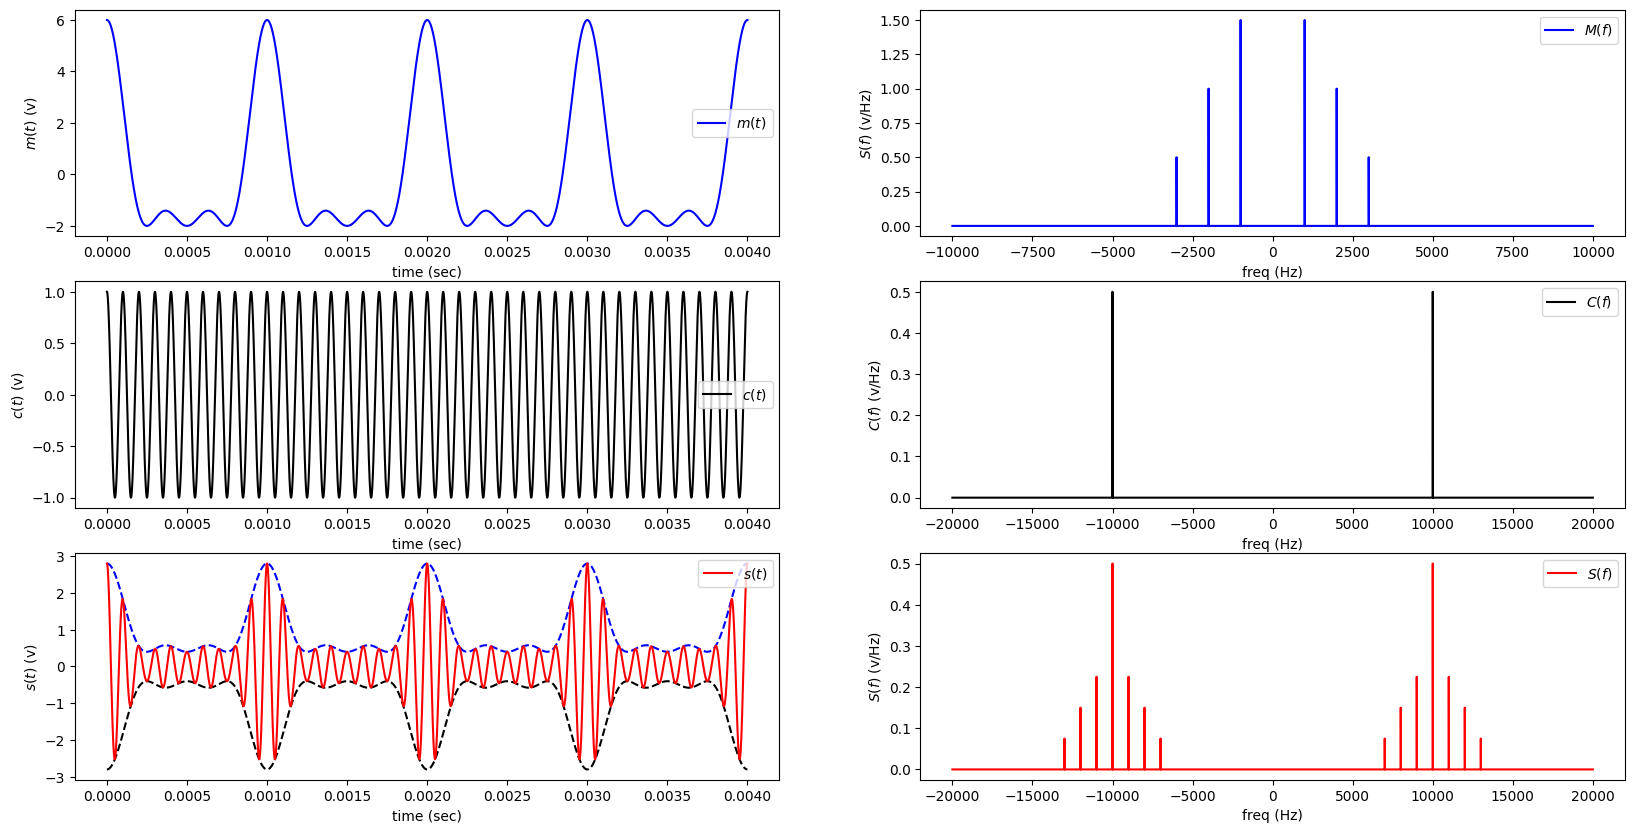

In [ ]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

# Proyecto 2- IE0247 Resultados

En esta sección se presentan los resultados obtenidos al realizar diversas modificaciones a parámetros del código

**Pregunta 1**

En la primera sección correspondiente a los  "Paramétros involucrados en la modulación AM". En esta sección se encuentran tres tipos de señal; la señal AM dada por s(t)=Ac[1+Kam(t)]cos(2πfct), la señal mensaje m(t)=Amcos(2πfmt) y la señal portadora   c(t)=Accos(2πfct).
Los parametros de esta sección y sus valores iniciales son:

Am=1 # Amplitud de la señal mensaje

fm=1000 # Frecuencia de la señal mensaje

Ac=1 # Amplitud de la portadora

fc=10000 # Frecuencia de la portadora

Ka=0.5 # Parámetro de sensibilidad de la amplitud.

Las gráficas de las tres funciones de esta sección se ven de la siguiente manera:
***
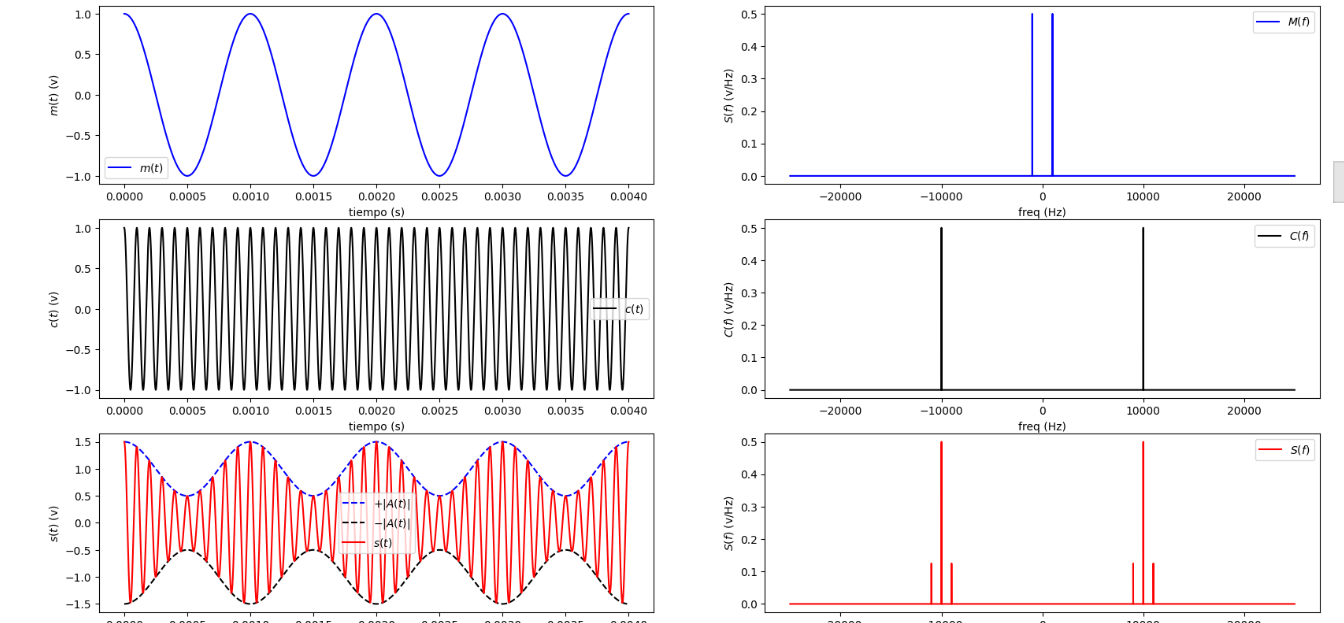

Variación de paramétros:

a) fm1

b) fc

c) Am

d) Ac

e) Ka

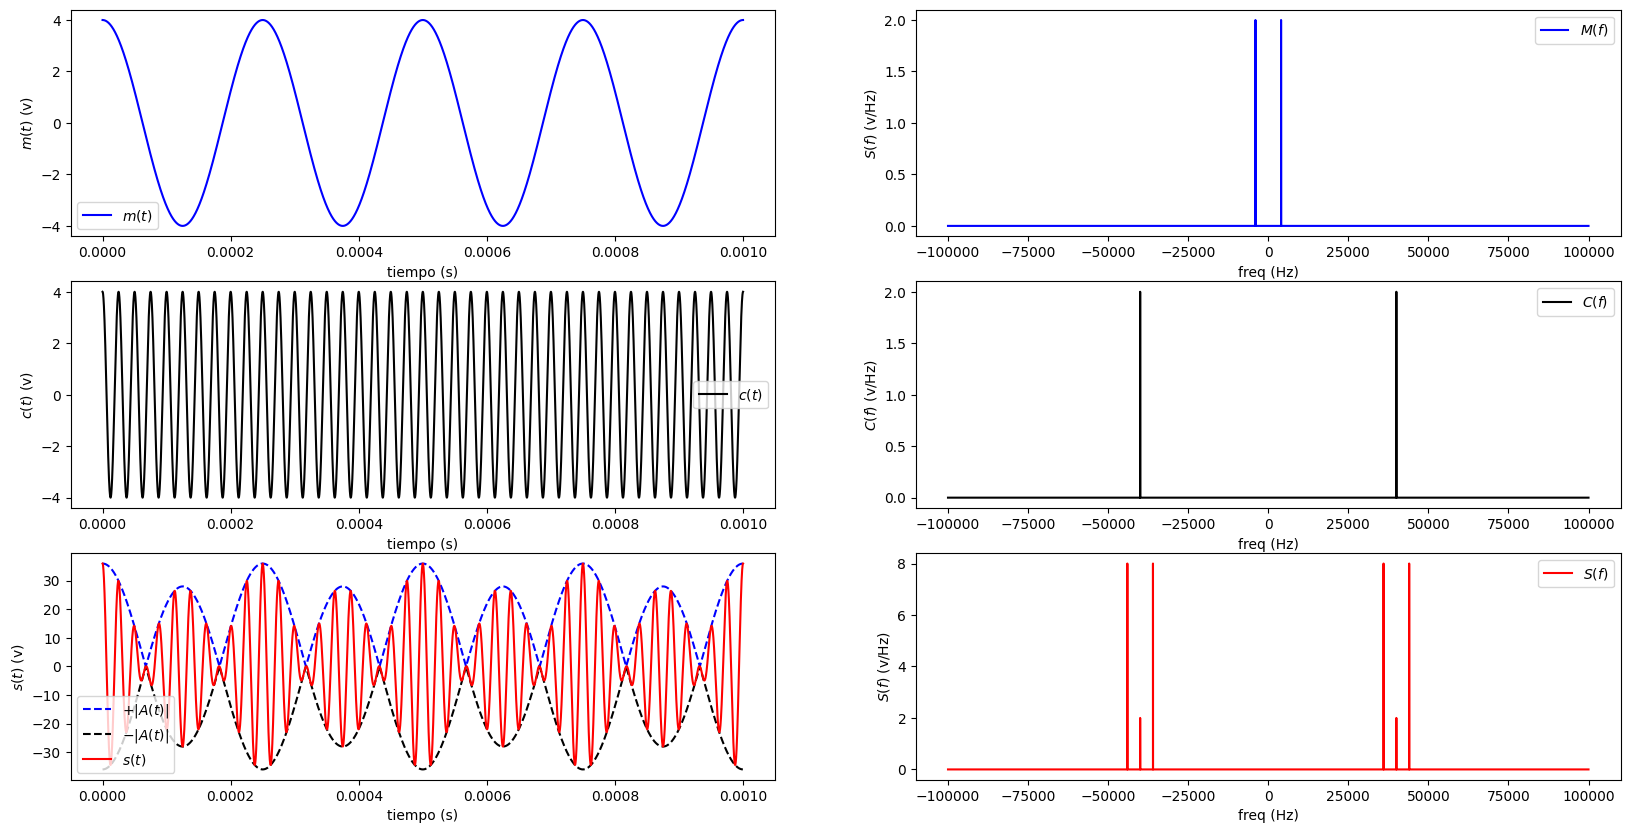

In [ ]:
Am=4 # Amplitud de la señal mensaje
fm=4000 # Frecuencia de la señal mensaje
Ac=4 # Amplitud de la portadora
fc=40000 # Frecuencia de la portadora
Ka=2 # Parámetro de sensibilidad de la amplitud


## -- No es necesario modificar el código a partir de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# plot the signals
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('tiempo (s)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('tiempo (s)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--',label='$+|A(t)|$')
ax5.plot(t,-1*At,'k--', label='$-|A(t)|$')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('tiempo (s)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=Am*np.cos(2*math.pi*fm*t) # Señal mensaje
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st=(1+Ka*mt)*ct # Señal modulada AM
At=Ac*(1+Ka*mt)

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('freq (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('freq (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()


Explicación de resultados:
Todos los valores de los parámetros dados anteriormente se multiplicaron por un factor de 4 para hacerlos más grandes. Obteniendo lo siguiente:
1. Los valores de las amplitudes que corresponden a los parámetros Am y Ac tanto de la señal mensaje como de la señal portadora respectivamente son 4, es decir ahora la oscilación va de -4 a 4 y sus espectros tambien se vieron afectados en los valores de amplitud pero no en su posición en la frecuencia.
2. Al modificar los parámetros fm y fc que corrsponden a la frecuencia de la señal mensaje y portadora respectivamente lo que sucede es que ahora se toman mas muestras de la señal. Si se comparan las gráficas de las señales se puede observar que con el segundo valor de frecuencia se obtienen más ciclos de ambas señales.
3. Por la forma en la que esta definida la señal modulada AM esta contempla parámetros de las otras dos señales que al modificarlos tambien la afectan como lo es la frecuencia y amplitud de la señal portadora, así como la señal mensaje. Pero el paramétro Ka que es la sensibilidad de la amplitud lo que hace es modificar la amplitud de esta señal sea para aumentarla o disminuirla, en este caso como se miltiplico por 4 se aumento.

**Pregunta 2**

En esta siguiente sección "Efecto de cambiar el índice de modulación µ” se tienen tres señales mensaje las cuales dan como respuesta tres modulaciones distintas que se ven de la siguiente forma:

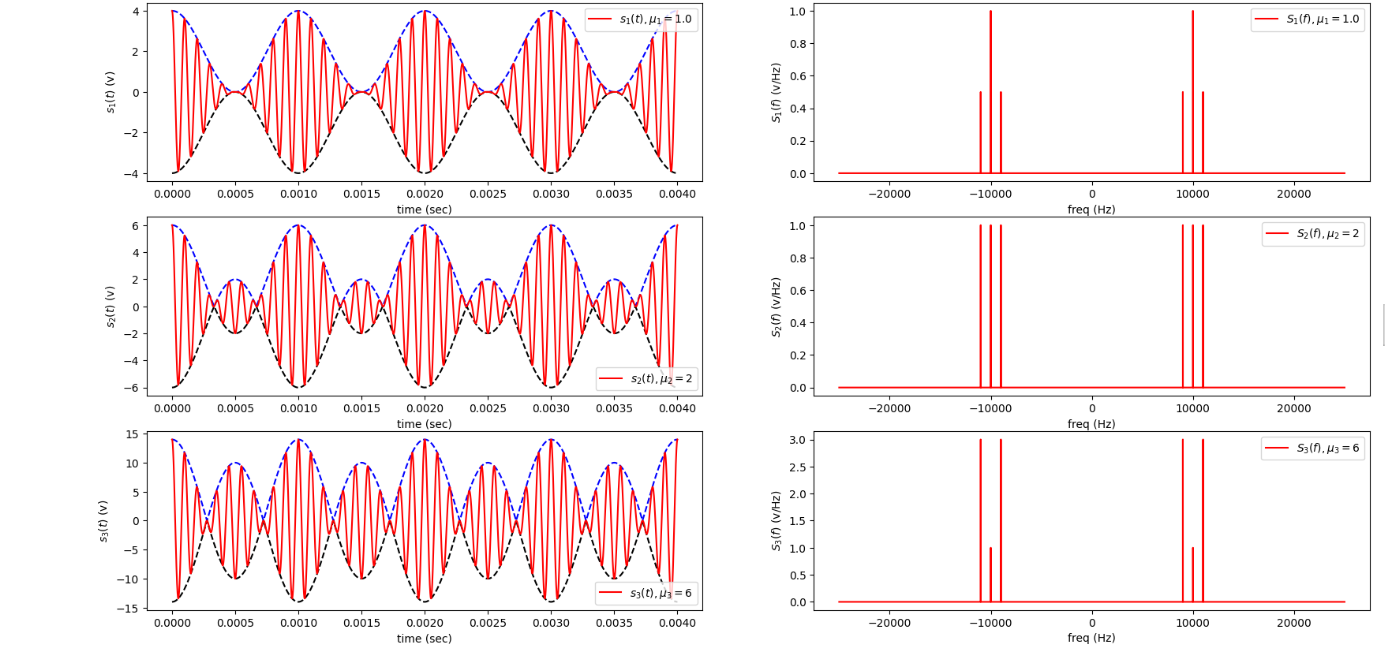
Los parámteros involucrados en esta seccción corresponden a:

Am1=0.5  # Amplitud de la señal de mensaje 1

Am2=1 # Amplitud de la señal de mensaje 2

Am3=3 # Amplitud de la señal de mensaje 3

fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora

fc=10000 # Frecuencia de la señal portadora

Ka=2 # Parámetro de sensibilidad de amplitud

Al realizar modificaciones a estos paramétros se pueden observar los siguentes cambios en las señales y sus espectros:

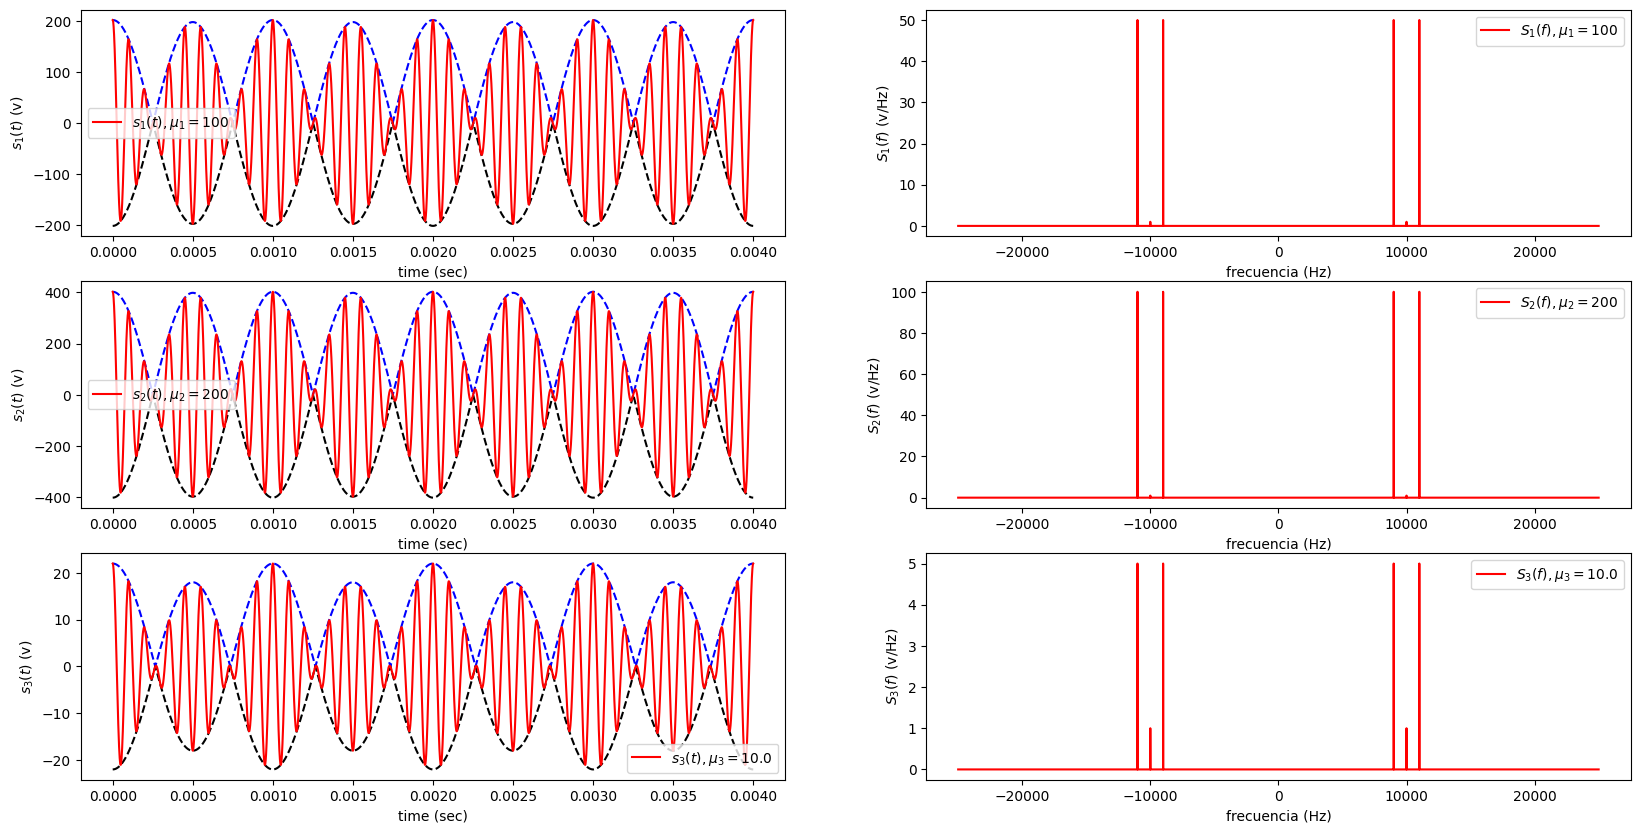

In [ ]:
Am1=5  # Amplitud de la señal de mensaje 1
Am2=10 # Amplitud de la señal de mensaje 2
Am3=0.5 # Amplitud de la señal de mensaje 3
fm=1000 # Frecuencia de las señales mensaje

Ac=2 # Amplitud de la señal portadora
fc=10000 # Frecuencia de la señal portadora
Ka=20 # Parámetro de sensibilidad de amplitud

## -- No es necesario modificar el código después de esta línea
## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Eje tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

mu1=Am1*Ka
mu2=Am2*Ka
mu3=Am3*Ka

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Gráficas de las señales
ax1.plot(t,At1,'b--',)
ax1.plot(t,-1*At1,'k--')
ax1.plot(t,st1,'r', label='$s_1(t), \mu_1=$'+str(mu1))
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$s_1(t)$ (v)')
ax1.legend()

ax3.plot(t,At2,'b--')
ax3.plot(t,-1*At2,'k--')
ax3.plot(t,st2,'r',label='$s_2(t), \mu_2=$'+str(mu2))
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$s_2(t)$ (v)')
ax3.legend()

ax5.plot(t,At3,'b--')
ax5.plot(t,-1*At3,'k--')
ax5.plot(t,st3,'r',label='$s_3(t), \mu_3=$'+str(mu3))
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s_3(t)$ (v)')
ax5.legend()
## ---- Dominio de la frecuencia
Tstart=0
Tstop=10000/fc
Tstep=0.2/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt1=Am1*np.cos(2*math.pi*fm*t) # Señal mensaje 1
mt2=Am2*np.cos(2*math.pi*fm*t) # Señal mensaje 2
mt3=Am3*np.cos(2*math.pi*fm*t) # Señal mensaje 3
ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
st1=(1+Ka*mt1)*ct # Señal 1 modulada AM
st2=(1+Ka*mt2)*ct # Señal 2 modulada AM
st3=(1+Ka*mt3)*ct # Señal 3 modulada AM
At1=np.abs(Ac*(1+Ka*mt1))
At2=np.abs(Ac*(1+Ka*mt2))
At3=np.abs(Ac*(1+Ka*mt3))

Sf1 = np.abs(np.fft.fft(st1))
freqs = np.fft.fftfreq(st1.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf1=Sf1[idx]/N
ax2.plot(freqs, Sf1,'r',label='$S_1(f), \mu_1=$'+str(mu1))
ax2.set_xlabel('frecuencia (Hz)')
ax2.set_ylabel('$S_1(f)$ (v/Hz)')
ax2.legend()

Sf2 = np.abs(np.fft.fft(st2))
freqs = np.fft.fftfreq(st2.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf2=Sf2[idx]/N
ax4.plot(freqs, Sf2,'r',label='$S_2(f), \mu_2=$'+str(mu2))
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$S_2(f)$ (v/Hz)')
ax4.legend()

Sf3 = np.abs(np.fft.fft(st3))
freqs = np.fft.fftfreq(st3.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf3=Sf3[idx]/N
ax6.plot(freqs, Sf3,'r',label='$S_3(f), \mu_3=$'+str(mu3))
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S_3(f)$ (v/Hz)')
ax6.legend()

Explicación de resultados:

En el código anterior se modificaron los parámetros de amplitud de las tres señales mensaje Am1, Am2 y Am3 los cuales se aumentaron por un factor de 10 las dos primeras señales y se disminuyo por un factor de 6 la tercera. Las gráficas que se muestarn anteriormente son de la función de modulación AM la cual se definio en la sección introductoria con la siguiente función s(t)=Ac[1+Kam(t)]cos(2πfct) que depende de otros parametros de otras funciones y de la función mensaje como tal entonces al modificar las amplitudes de las funciones mensaje se modificaba tambien la de la señal AM que para los 3 casos aumentaron tanto en la señal como su espectro.
Otra cosa que tambien se modifica son los valores de la variable "u" que estan dadas por:
mu1=Am1*Ka

mu2=Am2*Ka

mu3=Am3*Ka

Pero estos tambien depende de Ka que es el parámetro de sensibilidad de amplitud lo cual no afecta la amplitud de la señal mensaje pero si de la señal AM.

Por último comparando las gráficas se puede observar que los cambios ocurrieron en la amplitud pero no en la frecuencia debido a que esta no sufrió modificaciones.


**Pregunta 3**

En está última sección de "Modulación AM de señales con multiples coomponentes armonicos" se define una nueva señal de modulación AM como X(t)=Am1cos(2πfc1t)+Am2cos(2πfc2t)+Am3cos(2πfc3t) la cual se de la suma de tres señales que dependen cada una de los parámetros de amplitud de la señal de mensaje respectiva y de la frecuencia de la portadora respectiva. Por lo tanto cuenta con 6 tipos de componentes distintos.

a) Variación de los paramétros de frecuencia de las señales mensaje Fm1, Fm2, Fm3:


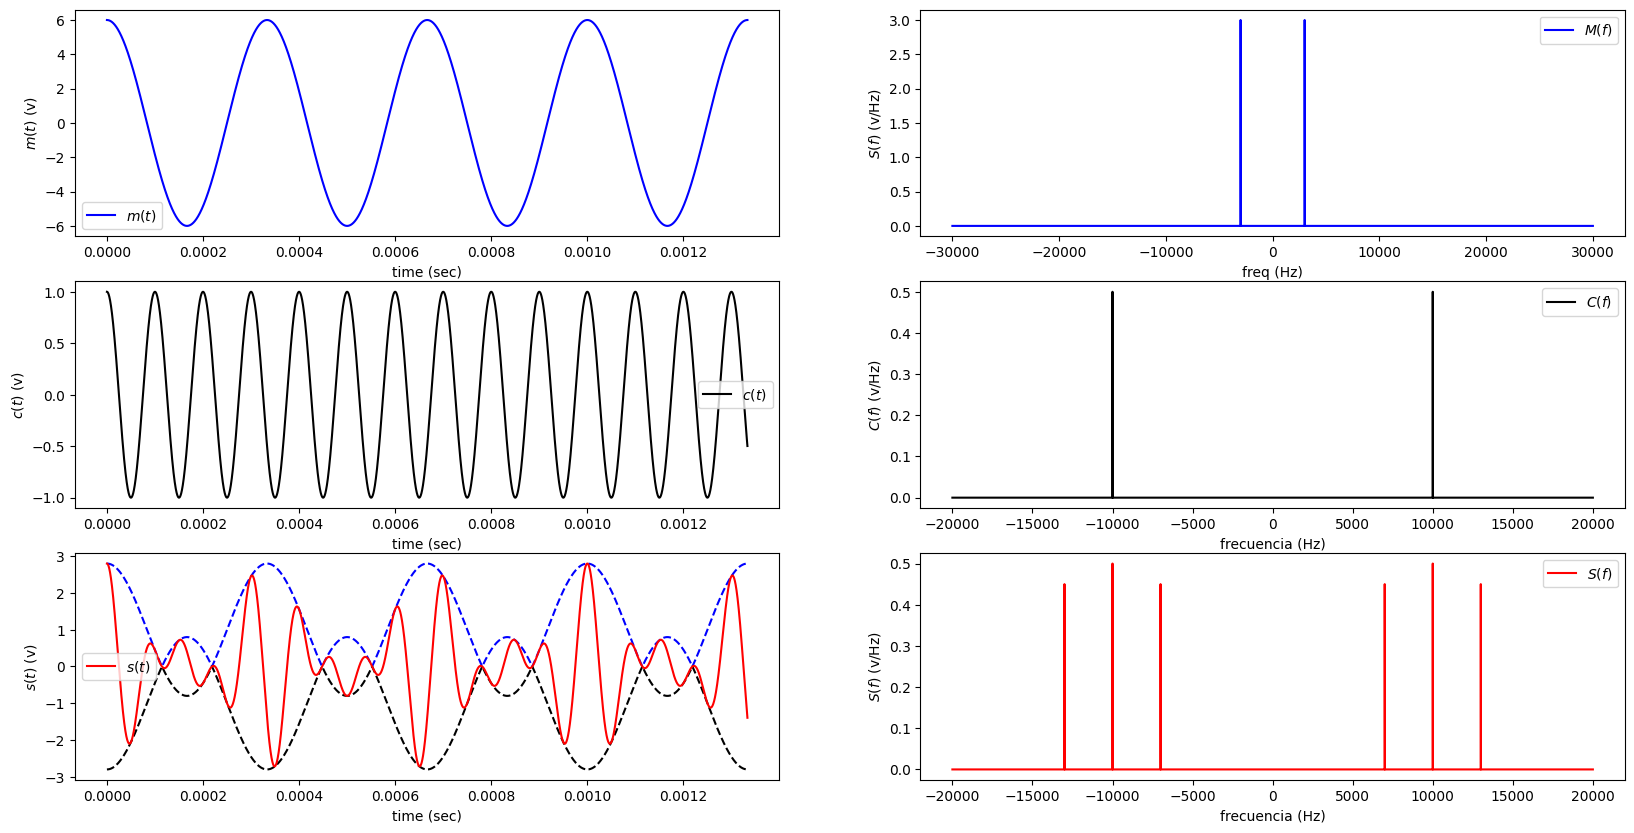

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Am1=3 # Amplitud de la componente 1
fm1=3000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=3000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Explicación de resultados:

Al cambiar los valores de frecuencia el espectro de la señal se ve directamente afectado en la posición de donde se encuentran sus componentes. Otro factor muy importante es que al variar los valores de la frecuencia se pueden producir traslapes en entre las señales si los valores son cercanos entre sí. Esto da explicación a lo que se ve en los gráficos anteriores de la señal mensaje que las tres frecuencias quedaron con el mismo valor y los cambios en la frecuencia de la señal modulada y su espectro.

b) Variación en la frecuencia de la portadora Fc


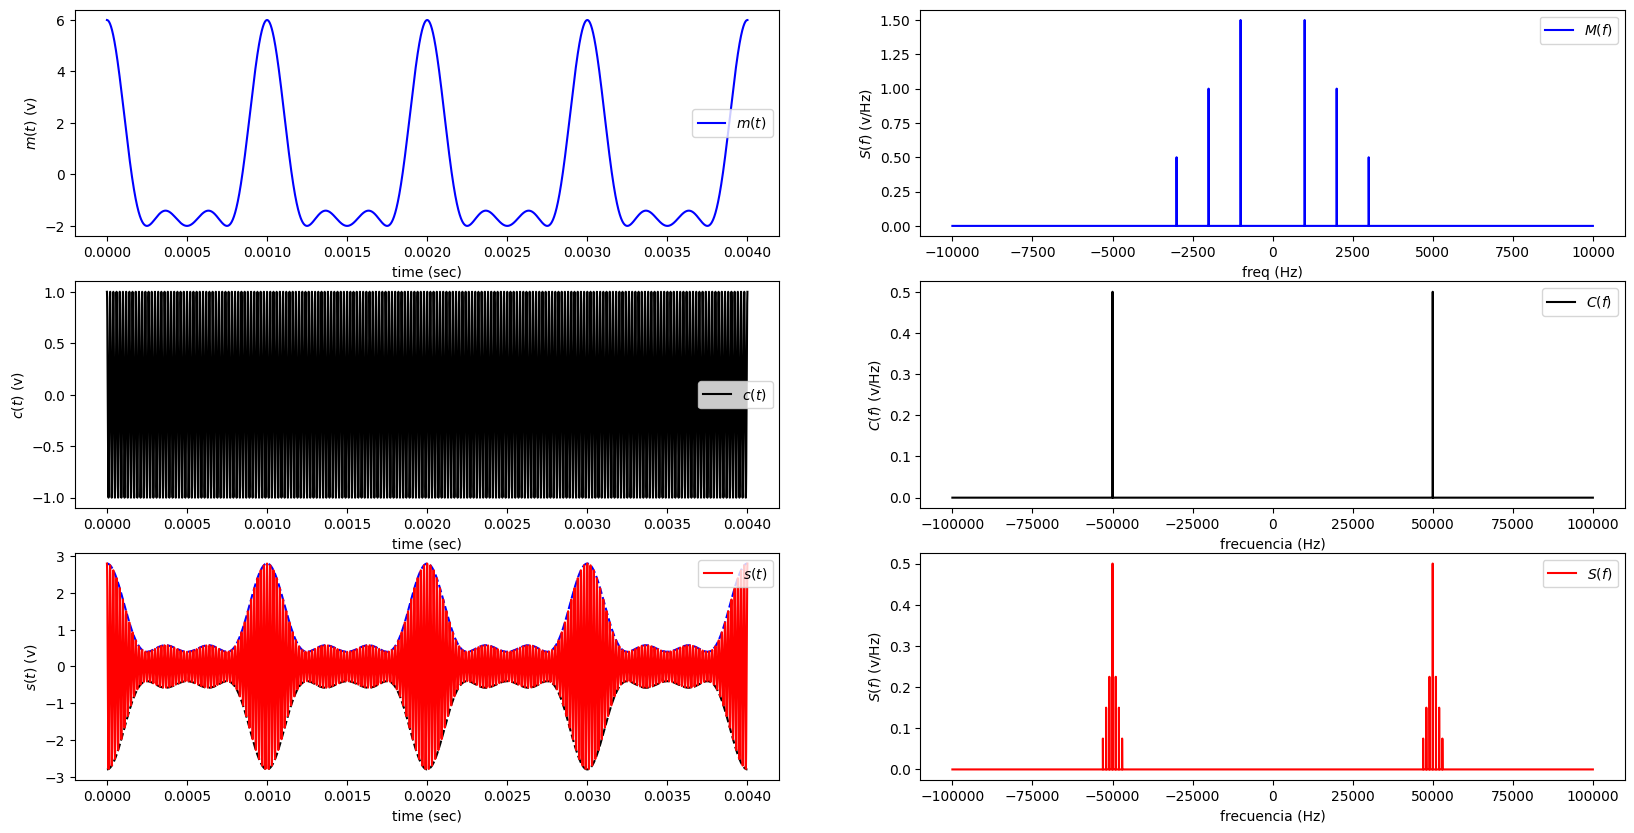

In [ ]:
def func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t):
   m1t=Am1*np.cos(2*math.pi*fm1*t) # Componente 1
   m2t=Am2*np.cos(2*math.pi*fm2*t) # Componente 2
   m3t=Am3*np.cos(2*math.pi*fm3*t) # Componente 3
   mt=m1t+m2t+m3t # Señal combinada
   return mt

def func_ct(Ac,fc,t):
   ct=Ac*np.cos(2*math.pi*fc*t) # Señal portadora
   return ct

def Am_mod(mt,ct,Ka):
   st=(1+Ka*mt)*ct # Modulación AM
   return st

Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=50000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Expicación de resultados:

Se cambio la frecuencia de la señal de 10000 (Hz) a 50000(Hz) por lo cual se pueden observar muchos mas ciclos de la señal portadora y en el espectro cambio la posición de sus componentes. Como la señal modula tambien depende de la frecuencia de la portadora esta tambein aumenta, es decir aumenta la frecuencia de transmisión y en el espectro el ancho de banda.

c) Aumento de la amplitud de las señales mensaje:


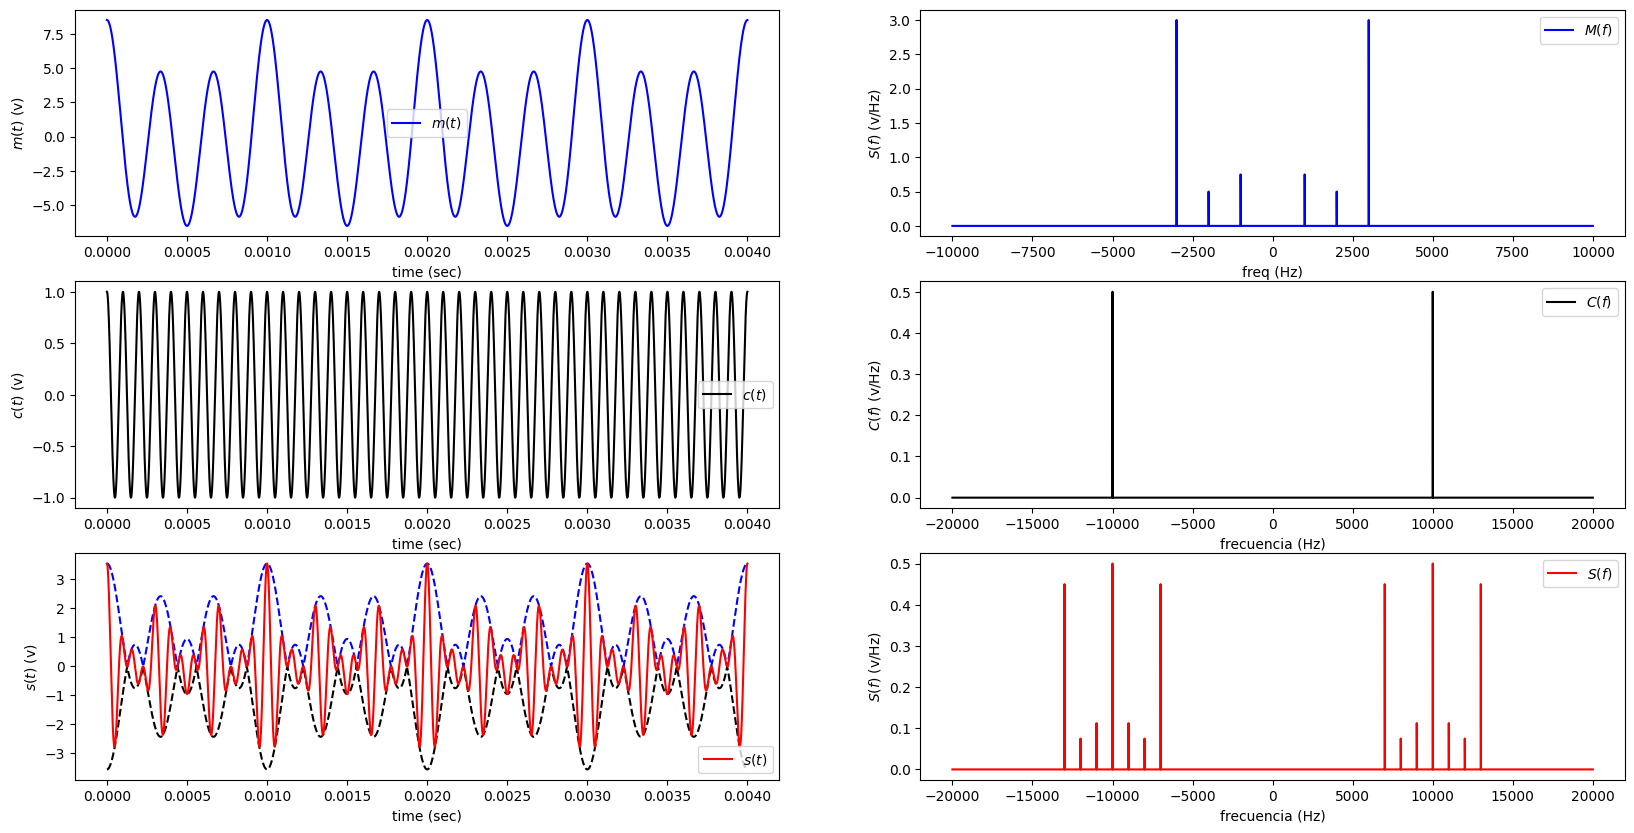

In [ ]:
Am1=1.5 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=1 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=6 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=1 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Explicación de los resultados:
Las amplitudes de las señales mensaje se ven directamente afectadas tanto en la señal como en el espectro pero sin producirse variaciones en la posición del espectro. Tambien la señal modulada se ve afectada por estos cambios de amplitud lo cual produce cambios en su forma de modulación.
La señal portadora no se ve afectada debido a que  o depende de estas variables.

d) Variación en la amplitud de la portadora Ac

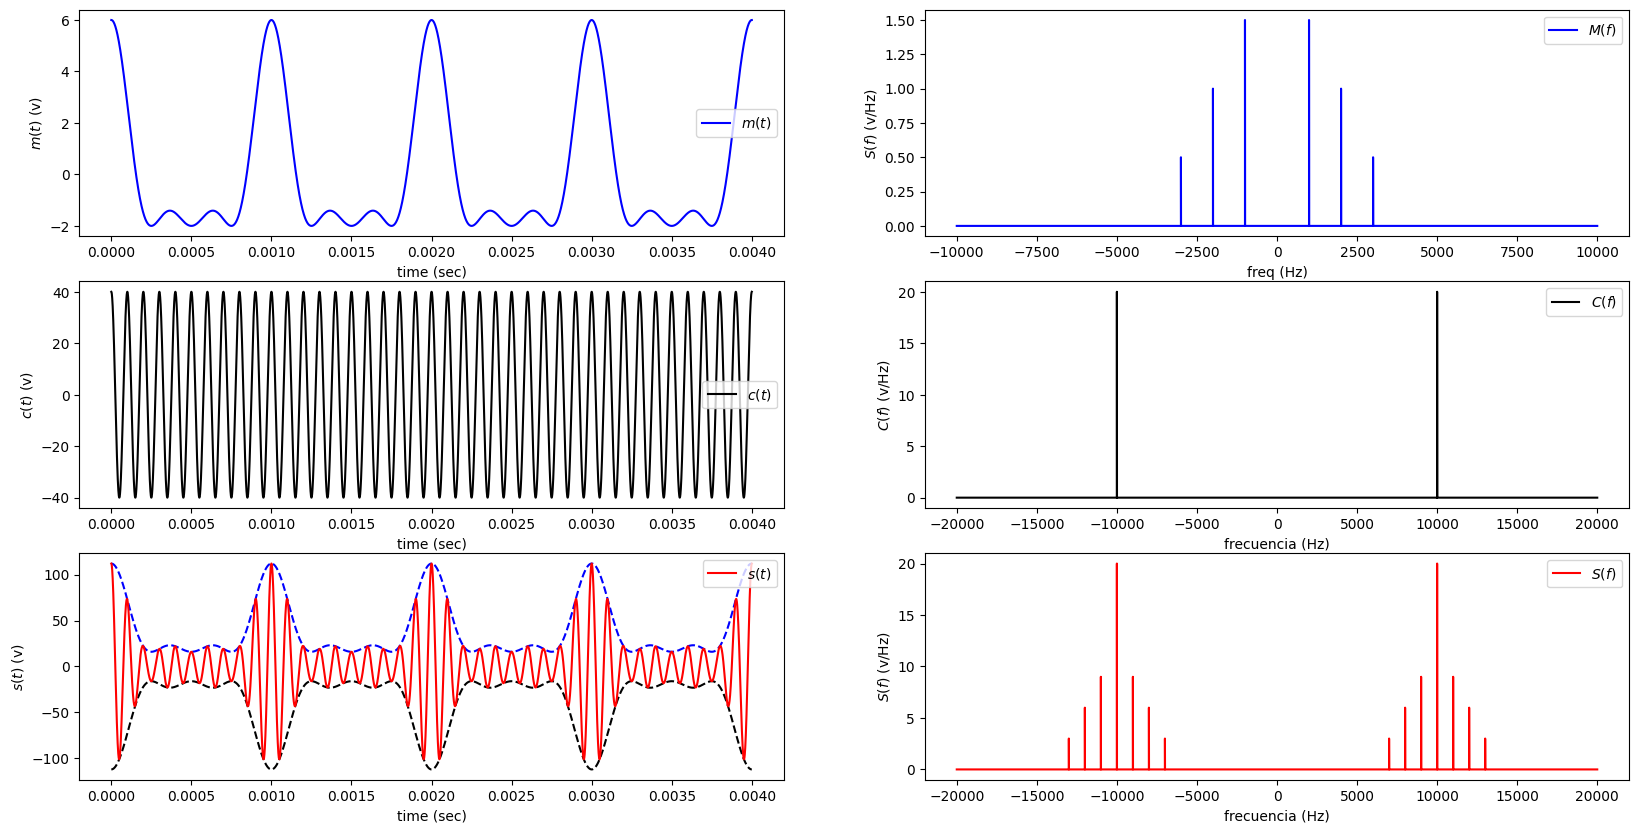

In [ ]:
Am1=3 # Amplitud de la componente 1
fm1=1000 # Frecuencia de la componente 1

Am2=2 # Amplitud de la componente 2
fm2=2000 # Frecuencia de la componente 2

Am3=1 # Amplitud de la componente 3
fm3=3000 # Frecuencia de la componente 3

Ac=40 # Amplitud de la portadora
fc=10000 # Frecuencia de la portadora
Ka=0.3 # Coeficiente de sensibilidad de amplitud

fm1_3=[fm1,fm2,fm3]

## -- No es necesario modificar el código después de esta línea
## Cálculo de la frecuencia fudamental de la señal, para su graficación.
fm=np.gcd.reduce(fm1_3)

## ---- Dominio del tiempo
Tstart=0
Tstop=4/fm
Tstep=0.0001/fm

t=np.arange(Tstart,Tstop,Tstep) # Tiempo
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Señal mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(321)
ax2 = f.add_subplot(322)
ax3 = f.add_subplot(323)
ax4 = f.add_subplot(324)
ax5 = f.add_subplot(325)
ax6 = f.add_subplot(326)

# Graficar las señales
ax1.plot(t,mt,'b',label='$m(t)$')
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('$m(t)$ (v)')
ax1.legend()

ax3.plot(t,ct,'k',label='$c(t)$')
ax3.set_xlabel('time (sec)')
ax3.set_ylabel('$c(t)$ (v)')
ax3.legend()

ax5.plot(t,At,'b--')
ax5.plot(t,-1*At,'k--')
ax5.plot(t,st,'r',label='$s(t)$')
ax5.set_xlabel('time (sec)')
ax5.set_ylabel('$s(t)$ (v)')
ax5.legend()

## ---- Dominio de la frecuencia
Tstart=0; Tstop=100000/fm; Tstep=0.05/fm
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje

Mf = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Mf=Mf[idx]/N
ax2.plot(freqs, Mf,'b',label='$M(f)$')
ax2.set_xlabel('freq (Hz)')
ax2.set_ylabel('$S(f)$ (v/Hz)')
ax2.legend()

Tstart=0; Tstop=100000/fc; Tstep=0.25/fc
t=np.arange(Tstart,Tstop,Tstep) # Tiempo
N=len(t)
mt=func_mt(Am1,fm1,Am2,fm2,Am3,fm3,t) # Mensaje
ct=func_ct(Ac,fc,t) # Portadora
st=Am_mod(mt,ct,Ka) # Modulación AM
At=np.abs(Ac*(1+Ka*mt))

Cf = np.abs(np.fft.fft(ct))
freqs = np.fft.fftfreq(ct.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Cf=Cf[idx]/N
ax4.plot(freqs, Cf,'k',label='$C(f)$')
ax4.set_xlabel('frecuencia (Hz)')
ax4.set_ylabel('$C(f)$ (v/Hz)')
ax4.legend()

Sf = np.abs(np.fft.fft(st))
freqs = np.fft.fftfreq(st.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
Sf=Sf[idx]/N
ax6.plot(freqs, Sf,'r',label='$S(f)$')
ax6.set_xlabel('frecuencia (Hz)')
ax6.set_ylabel('$S(f)$ (v/Hz)')
ax6.legend()

Explicación de los resultados:

Se observan cambios en la amplitud de la señal portadora y en su espectro. Tambien la señal modulada al estar multiplicada por la portadora se ve directamente afectada en su amplitud y el espectro de esta tambien. Lo que no se ve afectado es la amplitud de las señales mensaje.

**Conclusiones**
 El proyecto consistió esencialmente en cambiar valores de parámtetros y observar los cambios que producía en las señales. En la primera sección se presetan los parámetros individuales que conforman los tres tipos de señales y como afectan a cada una de estas. En la segunda tres señales mensaje y su relación con las señales modulas producidas.
  En la últimas sección se muestra una señal que es modelada por tres tipos de señales distintas y como esta modulación AM se ve afectada al variar el valor de uno o más de estos parámetros.

1. Las amplitudes de las señales mensaje están directamente relacionadas con la amplitud de la señal modulada. Lo cual puede producir consigo variaciones en la potencia del sistema.
2. Cuando la señal modulada esta dada por mas de una señal se debe de tener cuidado con las frecuencias de cada señal individual para evitar producir traslapes entre las señales y que la información modulada no se distorcione.

3. El aumentar la frecuencia de la señal portadora de información puede producir consigo un aumento en el ancho de banda de la señal. Además de aumentar la frecuencia de transmisión de la señal modulada.

